In [1]:
# conf inicial
import os
import sys
from pathlib import Path

from animaloc_improved.tools.infer_metrics import (
    create_visualization,
    get_single_image_data,
    load_trained_model,
    match_predictions_to_gt,
    predict_single_image,
    print_evaluation_results,
)

current_dir = Path.cwd()
if current_dir.name == "notebooks":
    os.chdir("../")
    sys.path.append("./")

c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This

In [2]:
SPECIES_MAP = {
    1: "Alcelaphinae",
    2: "Buffalo",
    3: "Kob",
    4: "Warthog",
    5: "Waterbuck",
    6: "Elephant",
}

COLORS = {
    "ground_truth": "green",
    "predictions": "red",
    "correct": "blue",
    "missed": "orange",
    "false_positive": "purple",
}


def eval_image(model_path, csv_file, image_root, image_name, device, threshold):
    image_path = os.path.join(image_root, image_name)
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")

    model = load_trained_model(model_path)
    ground_truth = get_single_image_data(csv_file, image_name)

    # Make predictions
    prediction_results = predict_single_image(model, image_path, device)
    predictions = prediction_results["detections"]

    # Match predictions to ground truth
    matches = match_predictions_to_gt(predictions, ground_truth, threshold)

    create_visualization(image_path, ground_truth, predictions, matches, COLORS, SPECIES_MAP)

    print_evaluation_results(matches, ground_truth, predictions, SPECIES_MAP)

    print("\nGround Truth Data:")
    print(ground_truth.to_string())

    print("\nPredictions:")
    print(predictions.to_string())

Loading model from: data/models/herdnet_v2/latest_model.pth
Found 7 ground truth annotations for 01802f75da35434ab373569fffc1fd65a3417aef_158.JPG
Making predictions for: 01802f75da35434ab373569fffc1fd65a3417aef_158.JPG


c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\albumentations\core\composition.py:331: UserWarning: Got processor for keypoints, but no transform to process it.
  self._set_keys()


 [1/1] eta: 0:00:00  time: 0.3214 data: 0.0092 max mem: 226
 Total time: 0:00:00 (0.3223 s / it)
Found 6 predictions


c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\animaloc\eval\metrics.py:315: RuntimeWarning: invalid value encountered in divide
  recalls = sorted_table[:,2] / n_gt


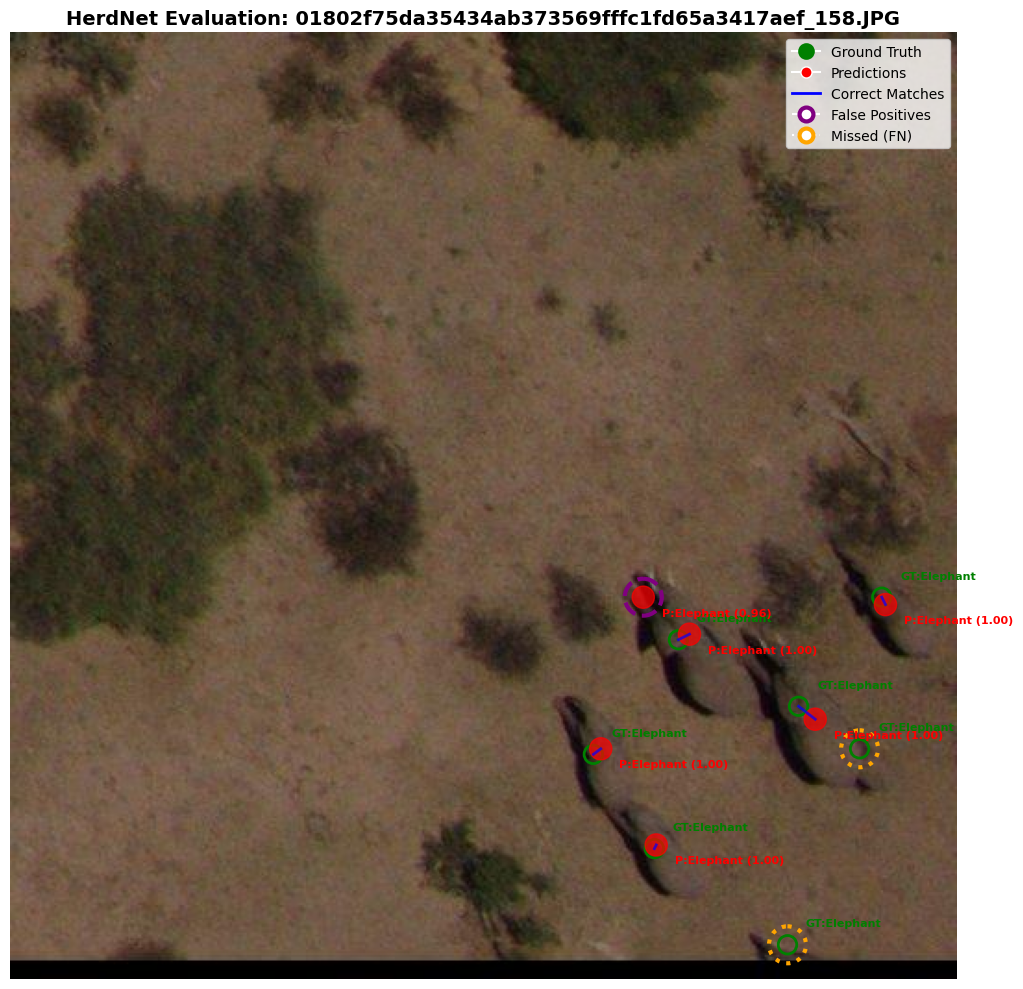


EVALUATION RESULTS
Ground Truth Points: 7
Predicted Points: 6
True Positives: 5
False Positives: 1
False Negatives: 2
Precision: 0.833
Recall: 0.714
F1-Score: 0.769

PER-CLASS BREAKDOWN:
----------------------------------------
Elephant: GT=7, Pred=6, TP=5

Ground Truth Data:
                                             images    x    y  labels
0  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  471  305       6
1  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  459  387       6
2  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  426  364       6
3  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  361  328       6
4  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  315  390       6
5  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  348  441       6
6  01802f75da35434ab373569fffc1fd65a3417aef_158.JPG  420  493       6

Predictions:
                                             images  labels    scores   dscores      x      y  count_1  count_2  count_3  count_4  count_5  count_6


In [3]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "01802f75da35434ab373569fffc1fd65a3417aef_158.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold)